In [41]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

In [42]:
csv_file = 'clothing-dataset/images.csv'
base_directory = 'clothing-dataset/images_original'
dest_dir = 'clothing-dataset/new_dataset'

data = pd.read_csv(csv_file)

train_dir = 'clothing-dataset/train_dataset'
val_dir = 'clothing-dataset/val_dataset'
test_dir = 'clothing-dataset/test_dataset'

# Split data into training (70%), validation (15%), and test (15%) sets
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Move all images to the correct directories
def move_images(data, dest_dir):
    for index, row in data.iterrows():
        image_path = row['image'] + ".jpg"
        class_name = ''
        if index < 10:
            print(row['label'])
        if row['label'] == 'Blazer' or row['label'] =='Longsleeve':
            class_name = 'Longsleeve'
        elif row['label'] == 'Polo' or row['label'] =='T-Shirt':
            class_name = 'T-Shirt'
        elif row['label'] == 'Blouse' or row['label'] =='Body' or row['label'] =='Dress' or row['label'] =='Other' or row['label'] == 'Top' or row['label'] =='Undershirt':
            class_name = 'Other'
        elif row['label'] == 'Skirt' or row['label'] == 'Shirt':
            class_name = 'Shorts'
        else:
            class_name = row['label']
         
        src_path = os.path.join(base_directory, image_path)
        dest_path = os.path.join(dest_dir, class_name)
        os.makedirs(dest_path, exist_ok=True)
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)
            
move_images(train_data, train_dir)
move_images(val_data, val_dir)
move_images(test_data, test_dir)

Shirt
Not sure
T-Shirt
T-Shirt
Not sure
T-Shirt
Shorts
Shoes
Shoes
Pants


In [43]:
import shutil
import os

def delete_dir(folder_path):
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)

delete_dir('clothing-dataset/train_dataset/Skip')
delete_dir('clothing-dataset/train_dataset/Not sure')
delete_dir('clothing-dataset/train_dataset/Hat')
delete_dir('clothing-dataset/train_dataset/Shoes')

delete_dir('clothing-dataset/val_dataset/Skip')
delete_dir('clothing-dataset/val_dataset/Not sure')
delete_dir('clothing-dataset/val_dataset/Hat')
delete_dir('clothing-dataset/val_dataset/Shoes')

delete_dir('clothing-dataset/test_dataset/Skip')
delete_dir('clothing-dataset/test_dataset/Not sure')
delete_dir('clothing-dataset/test_dataset/Hat')
delete_dir('clothing-dataset/test_dataset/Shoes')

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, Xception
from tensorflow.keras.layers import Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

!nvidia-smi

Sun Jul 21 12:49:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.52.01              Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   72C    P0             75W /   86W |    6122MiB /   8188MiB |     44%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
train_dir = 'clothing-dataset/train_dataset'
test_dir = 'clothing-dataset/test_dataset'
val_dir = 'clothing-dataset/val_dataset'

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/50
99/99 [==============================] - 214s 2s/step - loss: 1.2954 - accuracy: 0.5563 - val_loss: 1.1938 - val_accuracy: 0.6592
Epoch 2/50
99/99 [==============================] - 277s 3s/step - loss: 0.8356 - accuracy: 0.7207 - val_loss: 0.9291 - val_accuracy: 0.7188
Epoch 3/50
99/99 [==============================] - 211s 2s/step - loss: 0.6908 - accuracy: 0.7665 - val_loss: 0.8416 - val_accuracy: 0.7024
Epoch 4/50
99/99 [==============================] - 258s 3s/step - loss: 0.5922 - accuracy: 0.8050 - val_loss: 0.7729 - val_accuracy: 0.7292
Epoch 5/50
99/99 [==============================] - 201s 2s/step - loss: 0.5194 - accuracy: 0.8321 - val_loss: 0.7628 - val_accuracy: 0.7292
Epoch 6/50
99/99 [==============================] - 208s 2s/step - loss: 0.4601 - accuracy: 0.8556 - val_loss: 0.7651 - val_accuracy: 0.7366
Epoch 7/50
99/99 [==============================] - 194s 2s/step - loss: 0.4044 - accuracy: 0.8823 - val_loss: 0.7831 - val_accuracy: 0.7262
Epoch 8/50
99

In [15]:
model.save('classifier_model_50EPOCH_Xception.h5')

/home/omkos333/miniforge3/envs/tidyvision/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

predictions = model.predict(test_generator)

Found 694 images belonging to 7 classes.
22/22 [==============================] - 29s 1s/step


In [17]:
import numpy as np
y_pred = np.argmax(predictions, axis=1)

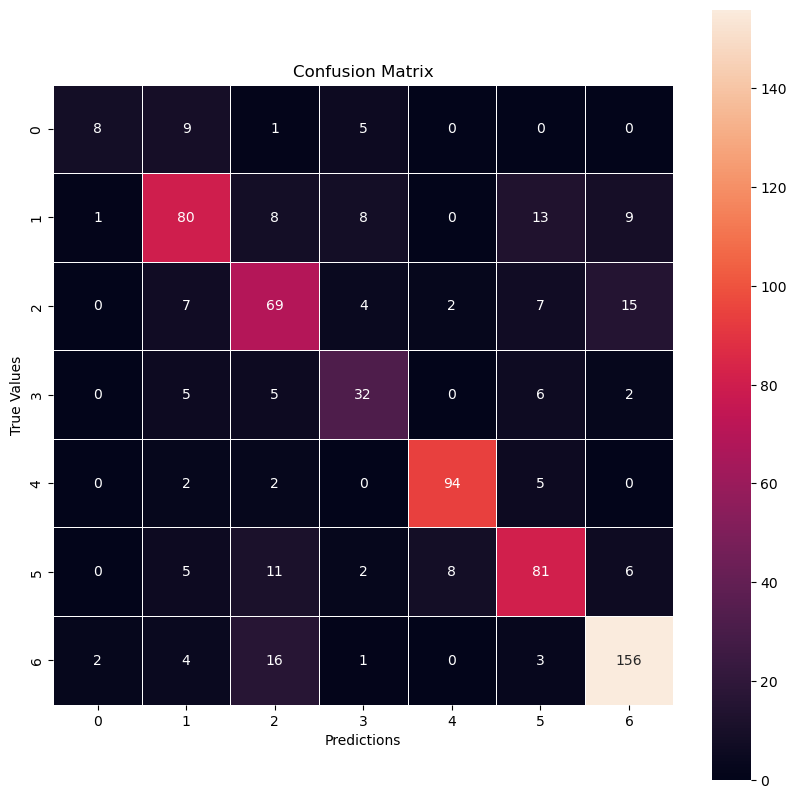

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_generator.classes

confusion_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=.5, square=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg')
plt.show()

In [72]:
from tensorflow.keras.preprocessing import image
import numpy as np

example1 = 'clothing-dataset/test_dataset/T-Shirt/1e0a18a1-234a-4a58-af40-37b12802cc64.jpg' # t-shirt
example2 = 'clothing-dataset/test_dataset/Pants/2dc14f11-7be1-4f03-a1c9-f8407f92d958.jpg' # pants
example3 = 'clothing-dataset/test_dataset/Shorts/6cbd8a06-b3b2-49ce-893d-13d49d1411be.jpg' # shorts

img = image.load_img(example2, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [73]:
pred = model.predict(img_array)

class_labels = list(train_generator.class_indices.keys()) 
pred_class = class_labels[np.argmax(pred)]

print("Predicted class:", pred_class)

1/1 [==============================] - 0s 21ms/step
Predicted class: T-Shirt
